In [22]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import dlib

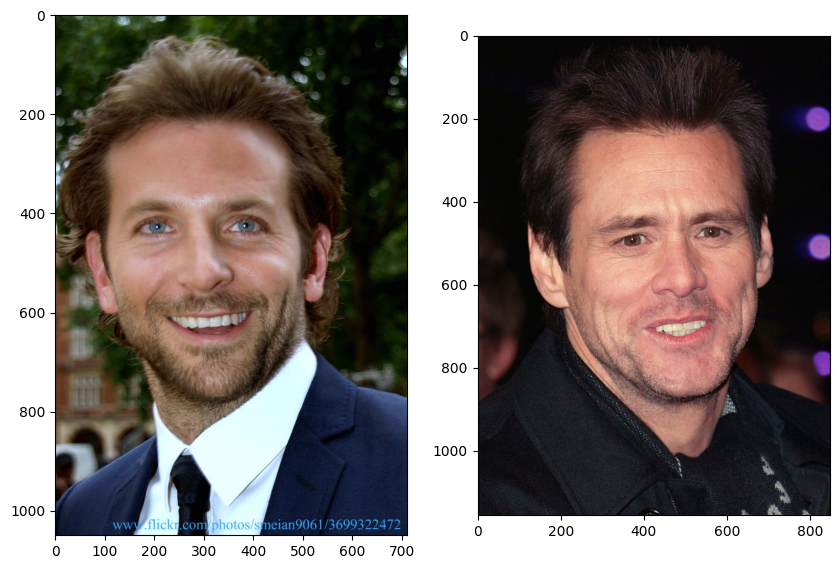

In [23]:
img = cv.imread(r"D:\Opencv\quiz 20\bradley_cooper.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
mask = np.zeros_like(img_gray)
img2 = cv.imread(r"D:\Opencv\quiz 20\jim_carrey.jpg")
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

height, width, ch = img2.shape
img2_new_face = np.zeros((height, width, ch), np.uint8)

plt.figure(figsize=[10,8])
plt.subplot(121);plt.imshow(img[...,::-1])
plt.subplot(122);plt.imshow(img2[...,::-1])

In [9]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(r"D:\Opencv\quiz 20\shape_predictor_68_face_landmarks.dat")

faces = detector(img_gray)
for face in faces:
    landmarks = predictor(img_gray, face)
    landmarks_points = []
    for n in range(0,68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x,y))

In [10]:
points = np.array(landmarks_points, np.int32)
convexhull = cv.convexHull(points)

cv.fillConvexPoly(mask, convexhull, 255)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index

face_image_1 = cv.bitwise_and(img, img, mask=mask)

rect = cv.boundingRect(convexhull)
subdiv = cv.Subdiv2D(rect)
subdiv.insert(landmarks_points)

triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype=np.int32)

index_triangles = []
for t in triangles:
    pt1 = (t[0], t[1])
    pt2 = (t[2], t[3])
    pt3 = (t[4], t[5])

    index_pt1 = np.where((points == pt1).all(axis=1))
    index_pt1 = extract_index_nparray(index_pt1)

    index_pt2 = np.where((points == pt2).all(axis=1))
    index_pt2 = extract_index_nparray(index_pt2)

    index_pt3 = np.where((points == pt3).all(axis=1))
    index_pt3 = extract_index_nparray(index_pt3)

    if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
            triangle = [index_pt1, index_pt2, index_pt3]
            index_triangles.append(triangle)

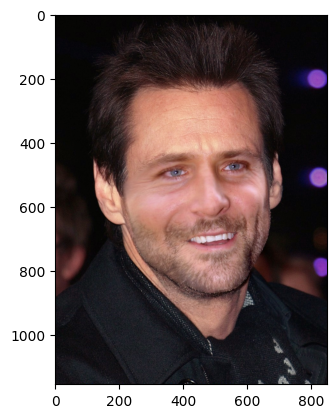

In [21]:
faces2 = detector(img2_gray)
for face in faces2:
    landmarks = predictor(img2_gray, face)
    landmarks_points2 = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points2.append((x, y))


    points2 = np.array(landmarks_points2, np.int32)
    convexhull2 = cv.convexHull(points2)

lines_space_mask = np.zeros_like(img_gray)
lines_space_new_face = np.zeros_like(img2)

for triangle_index in index_triangles:

    tr1_pt1 = landmarks_points[triangle_index[0]]
    tr1_pt2 = landmarks_points[triangle_index[1]]
    tr1_pt3 = landmarks_points[triangle_index[2]]
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)


    rect1 = cv.boundingRect(triangle1)
    (x, y, w, h) = rect1
    cropped_triangle = img[y: y + h, x: x + w]
    cropped_tr1_mask = np.zeros((h, w), np.uint8)


    points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                       [tr1_pt2[0] - x, tr1_pt2[1] - y],
                       [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)

    cv.fillConvexPoly(cropped_tr1_mask, points, 255)

    cv.line(lines_space_mask, tr1_pt1, tr1_pt2, 255)
    cv.line(lines_space_mask, tr1_pt2, tr1_pt3, 255)
    cv.line(lines_space_mask, tr1_pt1, tr1_pt3, 255)
    lines_space = cv.bitwise_and(img, img, mask=lines_space_mask)


    tr2_pt1 = landmarks_points2[triangle_index[0]]
    tr2_pt2 = landmarks_points2[triangle_index[1]]
    tr2_pt3 = landmarks_points2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)


    rect2 = cv.boundingRect(triangle2)
    (x, y, w, h) = rect2

    cropped_tr2_mask = np.zeros((h, w), np.uint8)

    points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                        [tr2_pt2[0] - x, tr2_pt2[1] - y],
                        [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)

    cv.fillConvexPoly(cropped_tr2_mask, points2, 255)
    faces2 = detector(img2_gray)
for face in faces2:
    landmarks = predictor(img2_gray, face)
    landmarks_points2 = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points2.append((x, y))


    points2 = np.array(landmarks_points2, np.int32)
    convexhull2 = cv.convexHull(points2)

lines_space_mask = np.zeros_like(img_gray)
lines_space_new_face = np.zeros_like(img2)

for triangle_index in index_triangles:

    tr1_pt1 = landmarks_points[triangle_index[0]]
    tr1_pt2 = landmarks_points[triangle_index[1]]
    tr1_pt3 = landmarks_points[triangle_index[2]]
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)


    rect1 = cv.boundingRect(triangle1)
    (x, y, w, h) = rect1
    cropped_triangle = img[y: y + h, x: x + w]
    cropped_tr1_mask = np.zeros((h, w), np.uint8)


    points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                       [tr1_pt2[0] - x, tr1_pt2[1] - y],
                       [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)

    cv.fillConvexPoly(cropped_tr1_mask, points, 255)

    cv.line(lines_space_mask, tr1_pt1, tr1_pt2, 255)
    cv.line(lines_space_mask, tr1_pt2, tr1_pt3, 255)
    cv.line(lines_space_mask, tr1_pt1, tr1_pt3, 255)
    lines_space = cv.bitwise_and(img, img, mask=lines_space_mask)

    tr2_pt1 = landmarks_points2[triangle_index[0]]
    tr2_pt2 = landmarks_points2[triangle_index[1]]
    tr2_pt3 = landmarks_points2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)


    rect2 = cv.boundingRect(triangle2)
    (x, y, w, h) = rect2

    cropped_tr2_mask = np.zeros((h, w), np.uint8)

    points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                        [tr2_pt2[0] - x, tr2_pt2[1] - y],
                        [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)

    cv.fillConvexPoly(cropped_tr2_mask, points2, 255)

    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv.getAffineTransform(points, points2)
    warped_triangle = cv.warpAffine(cropped_triangle, M, (w, h))
    warped_triangle = cv.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)


    img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
    img2_new_face_rect_area_gray = cv.cvtColor(img2_new_face_rect_area, cv.COLOR_BGR2GRAY)
    _, mask_triangles_designed = cv.threshold(img2_new_face_rect_area_gray, 1, 255, cv.THRESH_BINARY_INV)
    warped_triangle = cv.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    img2_new_face_rect_area = cv.add(img2_new_face_rect_area, warped_triangle)
    img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area

img2_face_mask = np.zeros_like(img2_gray)
img2_head_mask = cv.fillConvexPoly(img2_face_mask, convexhull2, 255)
img2_face_mask = cv.bitwise_not(img2_head_mask)


img2_head_noface = cv.bitwise_and(img2, img2, mask=img2_face_mask)
result = cv.add(img2_head_noface, img2_new_face)

(x, y, w, h) = cv.boundingRect(convexhull2)
center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))

seamlessclone = cv.seamlessClone(result, img2, img2_head_mask, center_face2, cv.NORMAL_CLONE)

plt.imshow(seamlessclone[...,::-1])